In [1]:
%matplotlib inline
from __future__ import division
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import common
import notebook_helpers

FS = (10, 7)

om = notebook_helpers.get_frame()
lyrs = notebook_helpers.get_frame(having_lyrics=True)

In [2]:
min_songs = 6 # TODO: decouple from artist bbox thing

songs_per_artist = lyrs.groupby('artist').size()
popstars = songs_per_artist[songs_per_artist >= min_songs].index.to_series()
print "Found {} popstars out of {} artists".format(len(popstars), len(songs_per_artist))

Found 668 popstars out of 4556 artists


In [3]:
star_lyrs = lyrs[lyrs['artist'].isin(popstars)]
meanratio = lyrs['ratio'].mean()
pseudocount = 2
pad = False
raw_star_rep = star_lyrs.groupby('artist')['ratio'].mean()
if pad:
    star_rep = ( raw_star_rep * songs_per_artist/(songs_per_artist+pseudocount) + 
        (meanratio * pseudocount/(songs_per_artist+pseudocount))
    )
else:
    star_rep = raw_star_rep
star_age = star_lyrs.groupby('artist')['yearf'].median()

In [4]:
print "Least repetitive artists... (global mean={})".format(meanratio)
star_rep.sort_values().head(10)

Least repetitive artists... (global mean=2.9516391468)


artist
Lobo               1.967721
Tony Bennett       2.040748
Joe Walsh          2.067660
Todd Rundgren      2.068579
Bread              2.106563
Chris Rea          2.118630
Bobby Goldsboro    2.162846
Crystal Gayle      2.186928
Brian Hyland       2.194062
The Rascals        2.199202
Name: ratio, dtype: float64

In [5]:
print "Most repetitive artists..."
star_rep.sort_values(ascending=False).head(20)

Most repetitive artists...


artist
KC And The Sunshine Band    4.811593
112                         4.314736
Selena Gomez                4.274805
Culture Club                4.274123
Destiny's Child             4.234488
Sean Paul                   4.161424
Jennifer Lopez              4.076137
Ellie Goulding              4.068097
Rihanna                     4.044107
Xscape                      4.008033
Pitbull                     4.006687
Meghan Trainor              3.979682
Ariana Grande               3.906699
Justin Timberlake           3.906212
Akon                        3.906165
Ashanti                     3.874062
Aaliyah                     3.873490
Gwen Stefani                3.861038
Selena Gomez & The Scene    3.851432
Lady Gaga                   3.810286
Name: ratio, dtype: float64

In [6]:
starframe = pd.DataFrame([star_age, star_rep]).T
starframe.head(2)
starframe[starframe['yearf']>1989].sample(20)

,yearf,ratio
artist,,
Backstreet Boys,2000.490639,3.468733
Little Big Town,2012.982420,3.152969
Ne-Yo,2008.424886,3.601474
R. Kelly,1999.407306,3.205789
Karyn White,1990.601941,3.039606
Winger,1990.236530,2.905621
Hannah Montana,2007.621689,3.142312
Chris Young,2012.313584,2.659656
Pitbull,2009.594292,4.006687


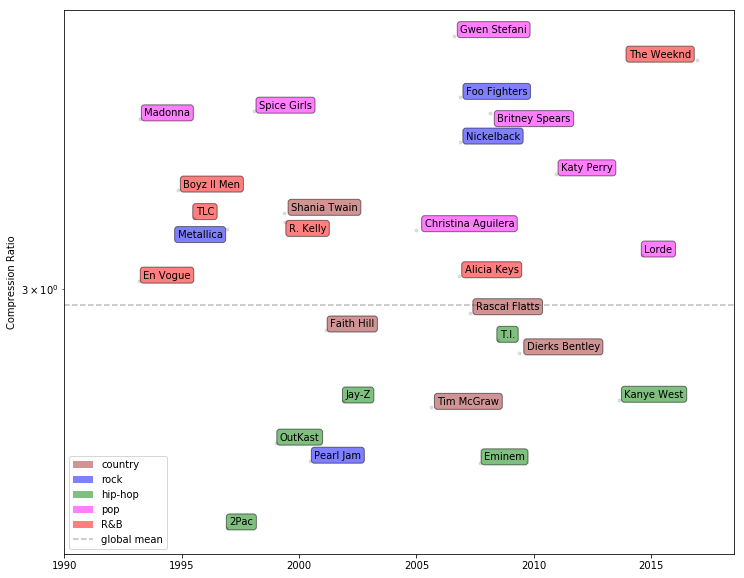

In [45]:
from matplotlib.transforms import blended_transform_factory as btf
from adjustText import adjust_text
import matplotlib.patches as mpatches
artist_to_genre = {
    'Gwen Stefani': 'pop',
    #'Beyonce': 'pop',
    'Madonna': 'pop',
    'Shania Twain': 'country',
    'T.I.': 'hip-hop',
    'Alicia Keys': 'R&B',
    'Faith Hill': 'country',
    'Dierks Bentley': 'country',
    'Boyz II Men': 'R&B',
    'Rascal Flatts': 'country',
    'Tim McGraw': 'country',
    'Christina Aguilera': 'pop',
    'Katy Perry': 'pop',
    'Jay-Z': 'hip-hop',
    'OutKast': 'hip-hop',
    'Eminem': 'hip-hop',
     'Britney Spears': 'pop',
    'Foo Fighters': 'rock',
    'Metallica': 'rock',
    'Nickelback': 'rock',
    'Kanye West': 'hip-hop',
    'TLC': 'R&B',
    'R. Kelly': 'R&B',
    'The Weeknd': 'R&B',
    'Spice Girls': 'pop',
    'Pearl Jam': 'rock',
    'Bon Jovi': 'rock',
    'En Vogue': 'R&B',
    '2Pac': 'hip-hop',
    'Lorde': 'pop',
}

genre_to_color = {
    'pop': 'fuchsia',
    'country': 'brown',
    'hip-hop': 'green',
    'R&B': 'red',
    'rock': 'blue'
}
genre_to_artist = {}
for a,g in artist_to_genre.iteritems():
    if g not in genre_to_artist:
        genre_to_artist[g] = []
    genre_to_artist[g].append(a)
    
fig, ax = plt.subplots(figsize=(12,10))

artists = artist_to_genre.keys()
yrs = starframe.loc[artists]['yearf']
rats = starframe.loc[artists]['ratio']
ax.scatter(yrs, rats,color='black', marker='.', alpha=.1)
genres = [artist_to_genre[a] for a in artists]
colors = [genre_to_color[g] for g in genres]
texts = []
for a,g,c in zip(artists, genres, colors):
    x = starframe.loc[a]['yearf']
    y = starframe.loc[a]['ratio']
    if 0:
        t = ax.annotate(a, xy=(x,y), 
                    #xytext=(x,y+.015), 
                    bbox=dict(boxstyle="round", fc=c, alpha=.5),
                    ha='center',
                    label=artist_to_genre[a]
                   )
    else:
        t = ax.text(x, y, a,
                    bbox=dict(boxstyle="round", fc=c, alpha=.5),
                    ha='center', label=artist_to_genre[a]
                   )
    texts.append(t)

ax.set_xlim(1990, 2018.5);
global_mean = lyrs['ratio'].mean()
line = plt.axhline(y=global_mean, color='black', label='overall mean', lw=2, linestyle='--', 
            alpha=.2, zorder=0)

recs = []
for c in genre_to_color.itervalues():
    recs.append(mpatches.Rectangle((0,0),1,1,fc=c,alpha=.5))
ax.legend(recs+[line],genre_to_color.keys()+['global mean'], loc=3)
ax.set_yscale('log')
adjust_text(texts);
ax.set_ylabel('Compression Ratio')
plt.savefig('artists.png')

In [32]:
om[
    (om['artist'].str.startswith('Madonna'))
]['artist'].unique()

array([u'Madonna Featuring Nicki Minaj & M.I.A.', u'Madonna',
       u'Madonna Featuring Justin Timberlake',
       u'Madonna Featuring Nicki Minaj'], dtype=object)

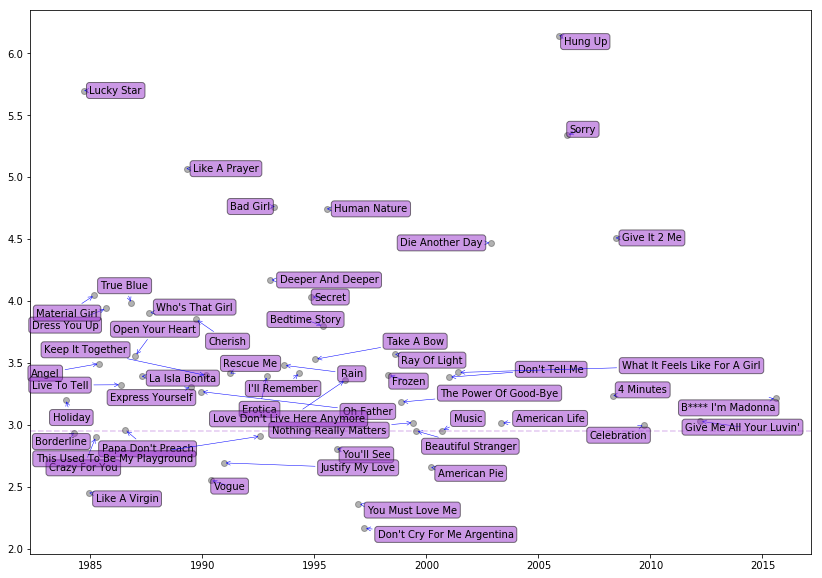

In [39]:
import re

def plot_discography(artist, text=True, min_pos=100, logy=False, figsize=(14,10), 
                     include_features=1, highlight_hits=0):
    fig, ax = plt.subplots(figsize=figsize)
    if include_features:
        madge = lyrs[(lyrs['artist'].str.startswith(artist)) & (lyrs['peak'] <= min_pos)]
    else:
        madge = lyrs[(lyrs['artist']==artist) & (lyrs['peak'] <= min_pos)]

    yrs = madge['yearf']
    rats = madge['ratio']
    ax.scatter(yrs, rats,color='black', alpha=.3)

    texts = []
    if text:
        for _, row in madge.iterrows():
            x = row['yearf']
            y = row['ratio']
            color = 'turquoise' if row['peak'] <= 10 and highlight_hits else 'darkorchid'
            title = re.sub(' \(.*\)', '', row['title'])
            t = ax.text(x, y, title,
                        bbox=dict(boxstyle="round", fc=color, alpha=.5),
                        va='center',
                        #ha='center', va='center'
                       )
            texts.append(t)
        adjust_text(texts, 
                arrowprops=dict(arrowstyle="->", color='b', lw=0.5),
                autoalign='x',
        );

    global_mean = lyrs['ratio'].mean()
    line = plt.axhline(y=global_mean, color='darkorchid', label='overall mean', lw=2, linestyle='--', 
                alpha=.2, zorder=0)
    if logy:
        ax.set_yscale('log')
    return ax

plot_discography('Madonna', logy=0, text=1, min_pos=100, include_features=1);

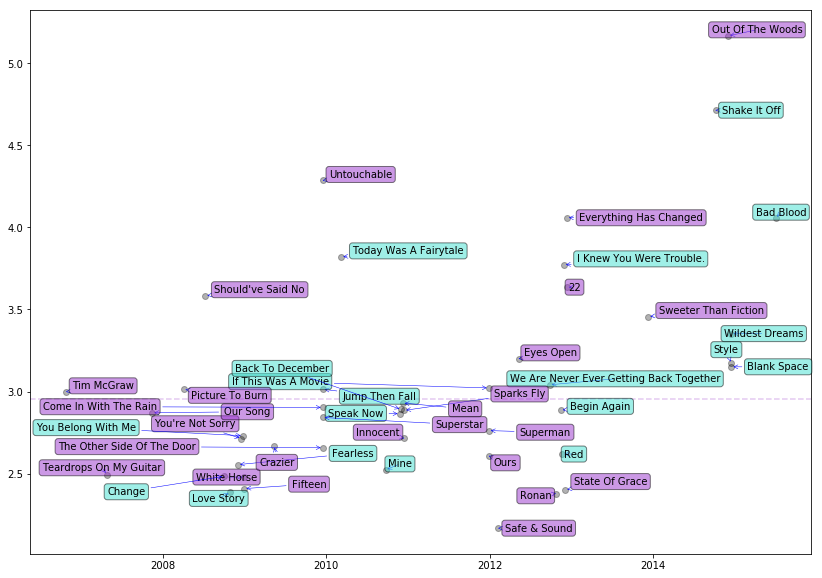

In [38]:
plot_discography('Taylor Swift', text=1, logy=False, min_pos=40);

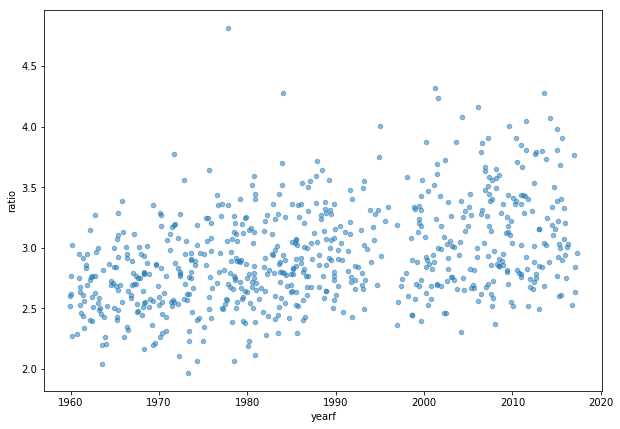

In [11]:
starframe.plot.scatter(x='yearf', y='ratio', figsize=FS, alpha=.5);

In [12]:
lyrs['artist'].value_counts()['Britney Spears']

28